In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# Default settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("seaborn-darkgrid")
os.makedirs(os.path.join('pic', 'test_Rmax_Rmin'), exist_ok=True)

C:\Users\dicky1031\AppData\Local\Temp\ipykernel_28000\478471028.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [30]:
R_SDS1_set = []
R_SDS2_set = []
count = 0
for blc in [138, 151, 174]:
    for i in range(10000):
        surrogate_result = pd.read_csv(os.path.join('dataset', 'surrogate_result', 'train', f'bloodConc_{blc}', 'SO2_0.7', f'{i}_train.csv'))
        IJV_large_SDS1 = surrogate_result['largeIJV_SDS1'].to_numpy()
        IJV_large_SDS2 = surrogate_result['largeIJV_SDS2'].to_numpy()
        IJV_small_SDS1 = surrogate_result['smallIJV_SDS1'].to_numpy()
        IJV_small_SDS2 = surrogate_result['smallIJV_SDS2'].to_numpy()
        R_SDS1 = (IJV_small_SDS1/IJV_large_SDS1).mean()
        R_SDS2 = (IJV_small_SDS2/IJV_large_SDS2).mean()
        if (R_SDS2 > R_SDS1) & (R_SDS1>1) & (R_SDS2>1):
            R_SDS1_set.append((IJV_small_SDS1/IJV_large_SDS1).mean())
            R_SDS2_set.append((IJV_small_SDS2/IJV_large_SDS2).mean())
        else:
            count += 1
# surrogate_result

In [93]:
# R_set = [R_SDS1_set] + [R_SDS2_set]
# R_set = np.array(R_set)
# idx1 = np.argsort(R_set)[0][::-1]
# idx1

array([ 873, 9084, 7960, ...,  292, 2847, 2861], dtype=int64)

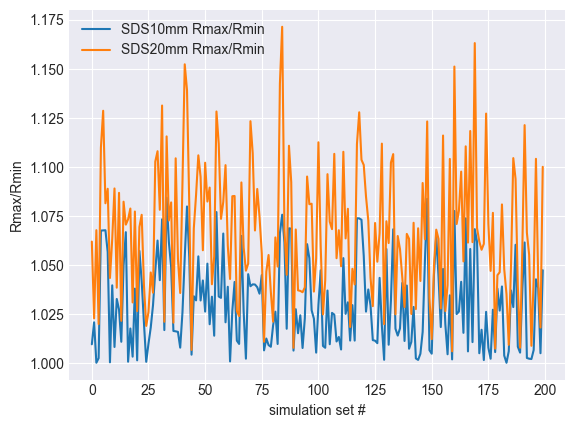

In [100]:
plt.plot(R_SDS1_set[5000:5200], label='SDS10mm Rmax/Rmin')
plt.plot(R_SDS2_set[5000:5200], label='SDS20mm Rmax/Rmin')
plt.xlabel('simulation set #')
plt.ylabel('Rmax/Rmin')
plt.legend()
plt.savefig(os.path.join("pic", 'test_Rmax_Rmin', "Rmax_Rmin.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

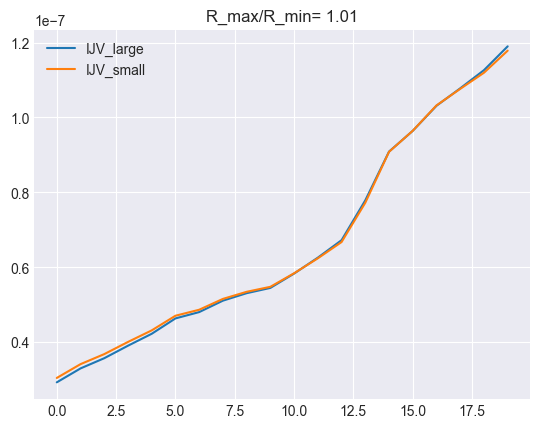

In [102]:
R = (IJV_small_SDS1/IJV_large_SDS1).mean()
plt.title(f'R_max/R_min= {R:.2f}')
plt.plot(IJV_large_SDS1, label='IJV_large')
plt.plot(IJV_small_SDS1, label='IJV_small')
plt.legend()
plt.savefig(os.path.join("pic", 'test_Rmax_Rmin', "SDS1_Rmax_Rmin.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

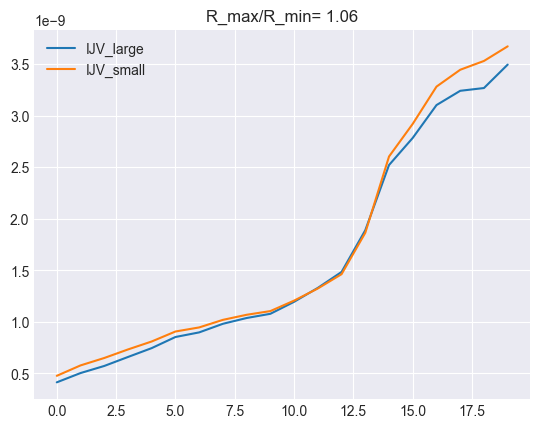

In [101]:
R = (IJV_small_SDS2/IJV_large_SDS2).mean()
plt.title(f'R_max/R_min= {R:.2f}')
plt.plot(IJV_large_SDS2, label='IJV_large')
plt.plot(IJV_small_SDS2, label='IJV_small')
plt.legend()
plt.savefig(os.path.join("pic", 'test_Rmax_Rmin', "SDS2_Rmax_Rmin.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [113]:
surrogate_result = pd.read_csv(os.path.join('dataset', 'surrogate_result', 'train', 'bloodConc_138', 'SO2_0.7', f'5000_train.csv'))
SO2_70_IJV_large_SDS1 = surrogate_result['largeIJV_SDS1'].to_numpy()
SO2_70_IJV_large_SDS2 = surrogate_result['largeIJV_SDS2'].to_numpy()
SO2_70_IJV_small_SDS1 = surrogate_result['smallIJV_SDS1'].to_numpy()
SO2_70_IJV_small_SDS2 = surrogate_result['smallIJV_SDS2'].to_numpy()

surrogate_result = pd.read_csv(os.path.join('dataset', 'surrogate_result', 'train', 'bloodConc_138', 'SO2_0.8', f'5000_train.csv'))
SO2_80_IJV_large_SDS1 = surrogate_result['largeIJV_SDS1'].to_numpy()
SO2_80_IJV_large_SDS2 = surrogate_result['largeIJV_SDS2'].to_numpy()
SO2_80_IJV_small_SDS1 = surrogate_result['smallIJV_SDS1'].to_numpy()
SO2_80_IJV_small_SDS2 = surrogate_result['smallIJV_SDS2'].to_numpy()

surrogate_result = pd.read_csv(os.path.join('dataset', 'surrogate_result', 'train', 'bloodConc_138', 'SO2_0.6', f'5000_train.csv'))
SO2_60_IJV_large_SDS1 = surrogate_result['largeIJV_SDS1'].to_numpy()
SO2_60_IJV_large_SDS2 = surrogate_result['largeIJV_SDS2'].to_numpy()
SO2_60_IJV_small_SDS1 = surrogate_result['smallIJV_SDS1'].to_numpy()
SO2_60_IJV_small_SDS2 = surrogate_result['smallIJV_SDS2'].to_numpy()

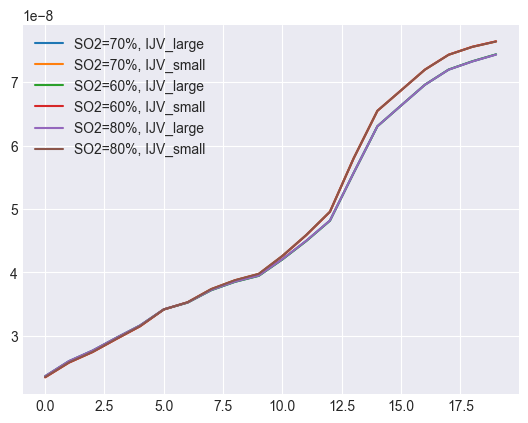

In [114]:
plt.plot(SO2_70_IJV_large_SDS1, label='SO2=70%, IJV_large')
plt.plot(SO2_70_IJV_small_SDS1, label='SO2=70%, IJV_small')
plt.plot(SO2_60_IJV_large_SDS1, label='SO2=60%, IJV_large')
plt.plot(SO2_60_IJV_small_SDS1, label='SO2=60%, IJV_small')
plt.plot(SO2_80_IJV_large_SDS1, label='SO2=80%, IJV_large')
plt.plot(SO2_80_IJV_small_SDS1, label='SO2=80%, IJV_small')
plt.legend()
# plt.savefig(os.path.join("pic", 'test_Rmax_Rmin', "SDS1_Rmax_Rmin.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

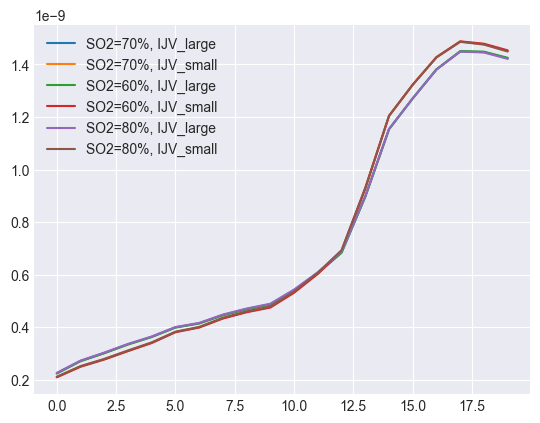

In [115]:
plt.plot(SO2_70_IJV_large_SDS2, label='SO2=70%, IJV_large')
plt.plot(SO2_70_IJV_small_SDS2, label='SO2=70%, IJV_small')
plt.plot(SO2_60_IJV_large_SDS2, label='SO2=60%, IJV_large')
plt.plot(SO2_60_IJV_small_SDS2, label='SO2=60%, IJV_small')
plt.plot(SO2_80_IJV_large_SDS2, label='SO2=80%, IJV_large')
plt.plot(SO2_80_IJV_small_SDS2, label='SO2=80%, IJV_small')
plt.legend()
# plt.savefig(os.path.join("pic", 'test_Rmax_Rmin', "SDS1_Rmax_Rmin.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()